## Useful tricks vol. 6 - NNs (MLP)

### Advantages
- able to capture information contained in large amounts of data
- ablet o build complex models

### Disadvantages
- work somewhat worse if the features are not scaled to mean 0 and std 1
- required careful tuning of parameters
- computationally costly

### Parameters
- number of layers, number of units per layer (`hidden_layer_sizes`)
- common approach: Overfit the network to see if the data can be actually learned, then decrease the complexity by shrinking and/or increasing L2 penalty (`alpha`)

#### When to use
Can build very complex models, particularly for large datasets. Sensitive to scaling of the data and to the choice of parameters. Large models need a long time to train

## Visualize the decision boundary and support vectors

In [10]:
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import mglearn
X, y = make_moons()
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [49]:
?MLPClassifier

Text(0.5, 1.0, '2 hidden layers, 10 units each, tanh')

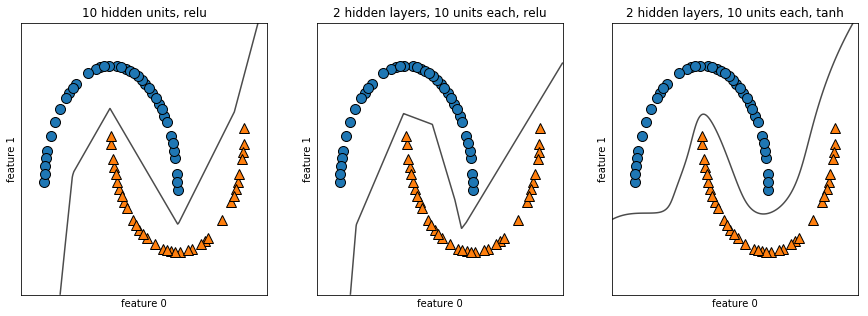

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, alpha=0.7, ax=axes[0])
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=axes[0])
axes[0].set_xlabel("feature 0")
axes[0].set_ylabel("feature 1")
axes[0].set_title("10 hidden units, relu")

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, alpha=0.7, ax=axes[1])
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=axes[1])
axes[1].set_xlabel("feature 0")
axes[1].set_ylabel("feature 1")
axes[1].set_title("2 hidden layers, 10 units each, relu") # smoother dec. bound.


mlp = MLPClassifier(solver='lbfgs', activation='tanh', hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, alpha=0.7, ax=axes[2])
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=axes[2])
axes[2].set_xlabel("feature 0")
axes[2].set_ylabel("feature 1")
axes[2].set_title("2 hidden layers, 10 units each, tanh")

We can also play around with the learning rate in combination with n_hidden

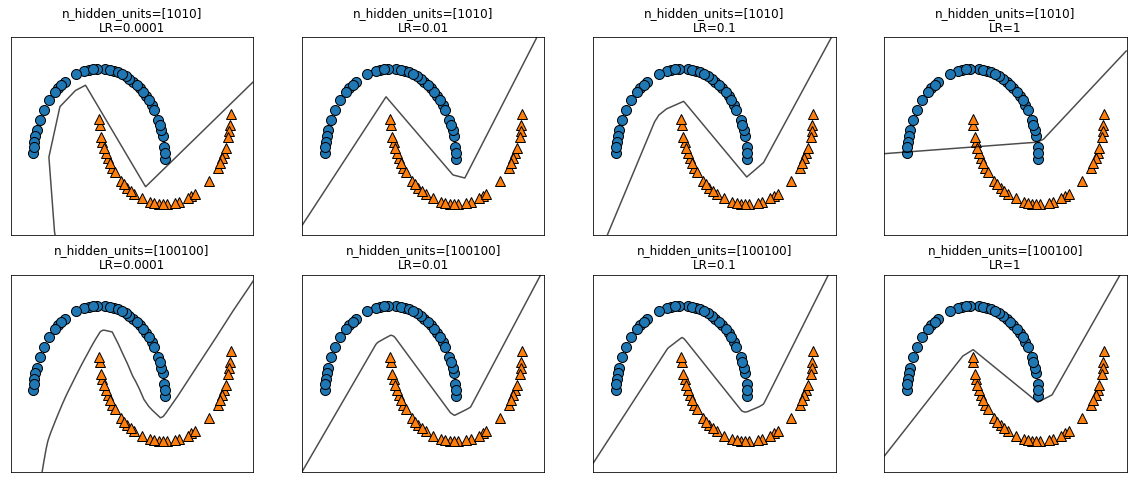

In [33]:
fig, axes = plt.subplots(2, 4, figsize=(20,8))
for ax, n_hidden_units in zip(axes, [10, 100]):
    for ax_, alpha in zip(ax, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[n_hidden_units, n_hidden_units], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, alpha=0.7, ax=ax_)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax_)
        ax_.set_title(f"n_hidden_units=[{n_hidden_units}{n_hidden_units}]\nalpha={alpha}")

In MLP the weights are set randomly, so the outcome heavily depends on a specific `random_state` setting of the network

In [36]:
from sklearn.datasets import load_breast_cancer
bc_dataset = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(bc_dataset.data,bc_dataset.target)
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
print(f"train score: {mlp.score(X_train, y_train)} | test score: {mlp.score(X_test, y_test)}")

train score: 0.9272300469483568 | test score: 0.9370629370629371


The performance is quite good, but still, Neural networks, like SVMs, expect the data to be +- of the same scale and ideally have the mean of 0, let's rescale the dataset

In [45]:
def rescale_using_mean_stddev(data):
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    data_scaled = (data - data_mean) / data_std
    return data_scaled

X_train_scaled = rescale_using_mean_stddev(X_train)
X_test_scaled = rescale_using_mean_stddev(X_test)

mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train_scaled, y_train)
print(f"train score: {mlp.score(X_train_scaled, y_train)} | test score: {mlp.score(X_test_scaled, y_test)}")

train score: 1.0 | test score: 0.9790209790209791


Increase the test set performance by managing complexity through `alpha`

In [46]:
mlp = MLPClassifier(max_iter=1000, alpha=1)
mlp.fit(X_train_scaled, y_train)
print(f"train score: {mlp.score(X_train_scaled, y_train)} | test score: {mlp.score(X_test_scaled, y_test)}")

train score: 0.9882629107981221 | test score: 0.965034965034965


#### Visualizing feature performance through colorbar of weights

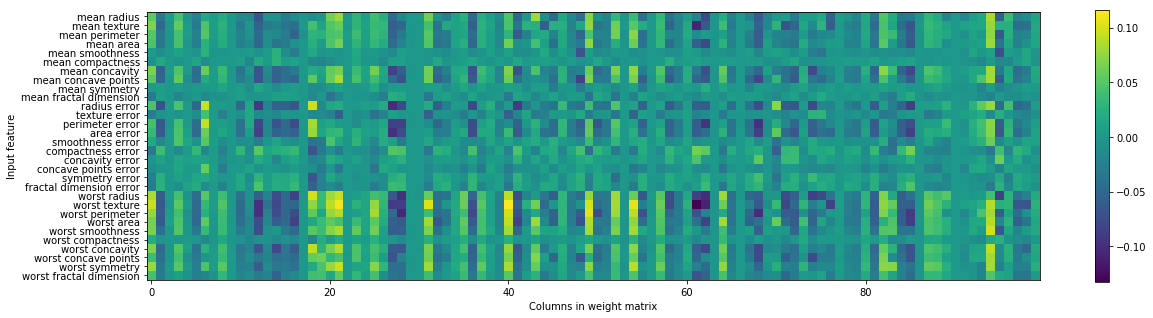

In [48]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), bc_dataset.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()